In [1]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from janome.tokenizer import Tokenizer

In [2]:
sentenses = pd.read_csv('../export/messages.csv')['text'].tolist()
sentenses

/Users/tomoya.koike/opt/anaconda3/envs/myslack/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (19,20,27,28,29,31,32,36,37,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


['<@U01GXHGR1FZ>さんがチャンネルに参加しました',
 '初めましてー、B4の白井です(永野アイコンをよく使ってます)\n普段はバックエンドメインでweb系の開発をしてます\nよろしくお願いします:pray:',
 'おおおおお！いつもTwitterで見てます！よろしくです！',
 '<@U026UD4B0H4> が誘ってくれた感じかな？',
 'プレイドでエンジニアをしてる山本です！\nKARTE Messageというプロダクトの開発のリーダーをしてます！\nよろしくお願いします！\n\n<https://twitter.com/handiboli7>',
 'よろしくお願いします！！\n<@U0272EM1D38>がサークルの後輩で誘ってくれました！(しぶちゃり君がいるのは知らなかったw)',
 'てことは <@U020A5ZTCGL> も知り合いすね！',
 '別の繋がりですが知り合いです！w',
 'あと、LayerXなら<@U025T3AM30U> さんと同じすね',
 '<@U02BB53U1LH>\n初めまして！\nNexceedという会社で建設業界のプロダクト開発をしている森永といいます！（10月ごろに転職予定ですが、、笑）\nよろしくお願いします！',
 'よろしくお願いしますー',
 'きよく〜ん',
 '<!channel>\n<@U0272EM1D38> の紹介で入ってくれた<@U02BB53U1LH> のroom作成しました〜！（<#C02B4PBPQA0|room-kiyo> ）\nみなさん是非入ってください！！\n\n<@U02BB53U1LH>\nroom-XXXは、自分の好きなこととか興味あることをみんな各々発信していっている場になってるので、いろんなことをどんどん話してもらえると嬉しいです！！',
 '<@U02BB53U1LH>\n<@UKDJ78A4V> の元でインターンとしてKARTE Messageの開発に関わらせてもらっているkipと言います！よろしくお願いします！',
 'よろしくお願いします！',
 '初めまして！京都大学4回生のホンです。\nてつおさんから招待いただいて参加しましたー！\nド文系の人間ですが、インターンでweb開発に関わっています。\n今はフロントエンドメインでやっていますが、バックエ

In [96]:
user_df = pd.read_csv('../export/users.csv', index_col=0)
user_df['real_name'] = user_df['real_name'].fillna('')
user_id_to_name = user_df.set_index('id')['real_name'].to_dict()

In [121]:
from joblib import Parallel, delayed
import re

tokenizer = Tokenizer()
user_id_pattern = re.compile('<@\w+>')
http_pattern = re.compile('<?https?://[\w./%-=\?]+')

def extract_base_form(sentense):
    if type(sentense) == float:
        if np.isnan(sentense):
            return []
            
    sentense = http_pattern.sub('', sentense)
    
    user_ids = user_id_pattern.findall(sentense)
    for user_id in user_ids:
        sentense = sentense.replace(user_id, user_id_to_name[user_id[2:-1]])
        
    return [token.base_form for token in tokenizer.tokenize(sentense)]


words = []
[words.extend(extract_base_form(s)) for s in tqdm(sentenses)]
words

100%|██████████████████████████████████████████████| 87943/87943 [01:31<00:00, 963.34it/s]


['さん',
 'が',
 'チャンネル',
 'に',
 '参加',
 'する',
 'ます',
 'た',
 '初め',
 'まして',
 'ー',
 '、',
 'B',
 '4',
 'の',
 '白井',
 'です',
 '(',
 '永野',
 'アイコン',
 'を',
 'よく',
 '使う',
 'て',
 'ます',
 ')',
 '\n',
 '普段',
 'は',
 'バックエンドメイン',
 'で',
 'web',
 '系',
 'の',
 '開発',
 'を',
 'する',
 'て',
 'ます',
 '\n',
 'よろしく',
 'お願い',
 'する',
 'ます',
 ':',
 'pray',
 ':',
 'おお',
 'おお',
 'お',
 '！',
 'いつも',
 'Twitter',
 'で',
 '見る',
 'て',
 'ます',
 '！',
 'よろしく',
 'です',
 '！',
 'sivchari',
 ' ',
 'が',
 '誘う',
 'て',
 'くれる',
 'た',
 '感じ',
 'か',
 'な',
 '？',
 'プレイド',
 'で',
 'エンジニア',
 'を',
 'する',
 'てる',
 '山本',
 'です',
 '！',
 '\n',
 'KARTE',
 ' ',
 'Message',
 'という',
 'プロダクト',
 'の',
 '開発',
 'の',
 'リーダー',
 'を',
 'する',
 'て',
 'ます',
 '！',
 '\n',
 'よろしく',
 'お願い',
 'する',
 'ます',
 '！',
 '\n\n',
 '>',
 'よろしく',
 'お願い',
 'する',
 'ます',
 '！',
 '！',
 '\n',
 'shota',
 '_',
 'kizawa',
 'が',
 'サークル',
 'の',
 '後輩',
 'で',
 '誘う',
 'て',
 'くれる',
 'ます',
 'た',
 '！(',
 'しぶい',
 'ちゃり',
 '君',
 'が',
 'いる',
 'の',
 'は',
 '知る',
 'ない',
 'た',
 'w',
 ')',
 'てこ',
 'と',
 'は',
 ' ',
 '

In [5]:
np.save('words.npy', words)

In [122]:
import collections

collections.Counter(words).most_common()

[(' ', 32088),
 ('の', 24470),
 ('\n', 19617),
 ('する', 18888),
 ('、', 16688),
 ('に', 16589),
 ('て', 16569),
 ('た', 16549),
 ('>', 14658),
 ('が', 13562),
 ('！', 12252),
 ('だ', 12245),
 ('は', 12003),
 ('を', 10435),
 ('で', 10391),
 ('と', 9097),
 ('ます', 8643),
 ('%', 8466),
 ('ない', 7923),
 ('か', 7180),
 (':', 6663),
 ('。', 6561),
 ('てる', 6543),
 ('です', 6263),
 ('？', 6191),
 ('も', 5827),
 ('\n\n', 5340),
 ('.', 5323),
 ('から', 4901),
 ('ある', 4442),
 ('-', 4345),
 ('ね', 4332),
 ('ん', 4314),
 ('そう', 3714),
 ('な', 3394),
 ('|>', 3394),
 ('なる', 3381),
 ('w', 3257),
 ('3', 3235),
 ('けど', 3070),
 ('やる', 3006),
 ('1', 2987),
 (';', 2968),
 ('とか', 2955),
 ('こと', 2884),
 ('いい', 2879),
 ('/', 2865),
 ('いる', 2844),
 ('&', 2842),
 ('これ', 2550),
 ('できる', 2508),
 ('れる', 2508),
 ('う', 2506),
 ('E', 2439),
 ('よ', 2409),
 ('笑', 2333),
 ('って', 2319),
 ('_', 2251),
 ('さん', 2246),
 ('gt', 2084),
 ('たい', 2081),
 ('（', 2041),
 ('思う', 2041),
 ('|', 2033),
 ('(', 2032),
 ('）', 1991),
 ('0', 1956),
 ('みる', 1926),
 ('

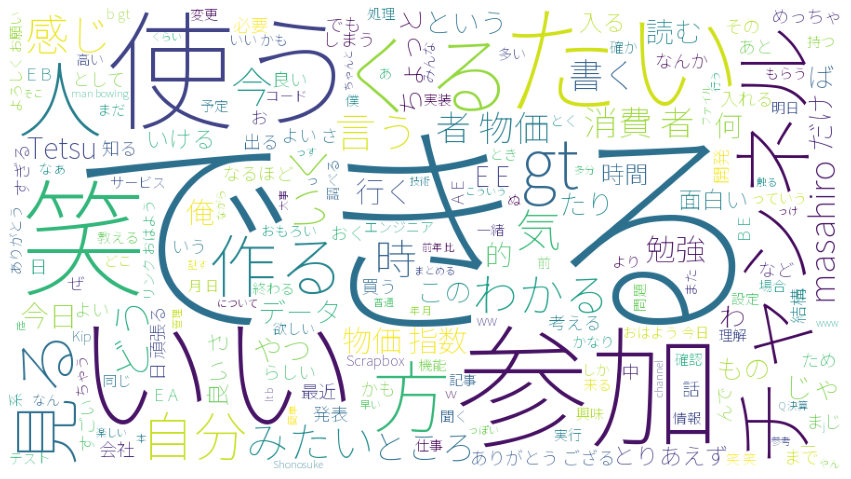

In [128]:
# c.f. https://qiita.com/kenmatsu4/items/9b6ac74f831443d29074

from wordcloud import WordCloud

fpath = "/Library/Fonts/SourceHanSans-VF.ttf"

# ストップワードの設定
stop_words = [ u'てる', u'いる', u'なる', u'れる', u'する', u'ある', u'こと', u'これ', u'さん', u'して', \
         u'くれる', u'やる', u'くださる', u'そう', u'せる', u'した',  u'思う',  \
         u'それ', u'ここ', u'ちゃん', u'くん', u'', u'て',u'に',u'を',u'は',u'の', u'が', u'と', u'た', u'し', u'で', \
         u'ない', u'も', u'な', u'い', u'か', u'ので', u'よう', u'', 
         u'とか', u'から', u'ます', u'だ', u'けど', u'w', u'です', u'みる', u'ん', u'って', u'や', u'ね', u'う', u'よ']

wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500, \
                      stopwords=set(stop_words)).generate(' '.join(words))

plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()